<a href="https://colab.research.google.com/github/avivleemann/Data-science-best-resources/blob/master/kaggle_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! kaggle datasets download -d alexandervc/scrnaseq-breast-cancer-cell-lines-atlas

 99% 574M/577M [00:28<00:00, 26.4MB/s]
100% 577M/577M [00:28<00:00, 20.9MB/s]


In [8]:
! unzip   scrnaseq-breast-cancer-cell-lines-atlas

Archive:  scrnaseq-breast-cancer-cell-lines-atlas.zip
  inflating: GSE173634_Human_BreastCancer_32CellLines_Y2021_35276Cells_Figshare_Counts_Gambardella_diBernardo.h5ad  
  inflating: MTX_FMT_GSE173634/barcodes.tsv  
  inflating: MTX_FMT_GSE173634/features.tsv  
  inflating: MTX_FMT_GSE173634/matrix.mtx  


In [9]:
!pip install pysam


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 15.8 MB/s eta 0:00:00


In [10]:

#@title Install packages
%%capture
! pip install lazypredict
! pip install pandas
! pip install numpy
! pip install scanpy
!pip install scikit-learn
!pip install anndata
!pip install seaborn

import pandas as pd
import numpy as np
import lazypredict
import scanpy  as sc
import io
import anndata
import seaborn as sns

# Only pandas >= v0.25.0 supports column names with spaces in querys


In [21]:
!pip install matplotlib
from matplotlib.pyplot import rc_context

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:

sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.10


In [30]:
!pip install leidenalg
import leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.2 MB/s eta 0:00:00


In [47]:
adata = sc.read_h5ad('GSE173634_Human_BreastCancer_32CellLines_Y2021_35276Cells_Figshare_Counts_Gambardella_diBernardo.h5ad')

In [53]:
adata.var_names_make_unique()  

In [54]:
adata

AnnData object with n_obs × n_vars = 35276 × 40726
    obs: 'FullCode', 'Cell Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Ensembl', 'Entrezgene', 'Type of gene', 'Map location', 'chr', 'start', 'end', 'strand', 'Count Pubmed', 'Count Pathways', 'Name', 'Other names', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

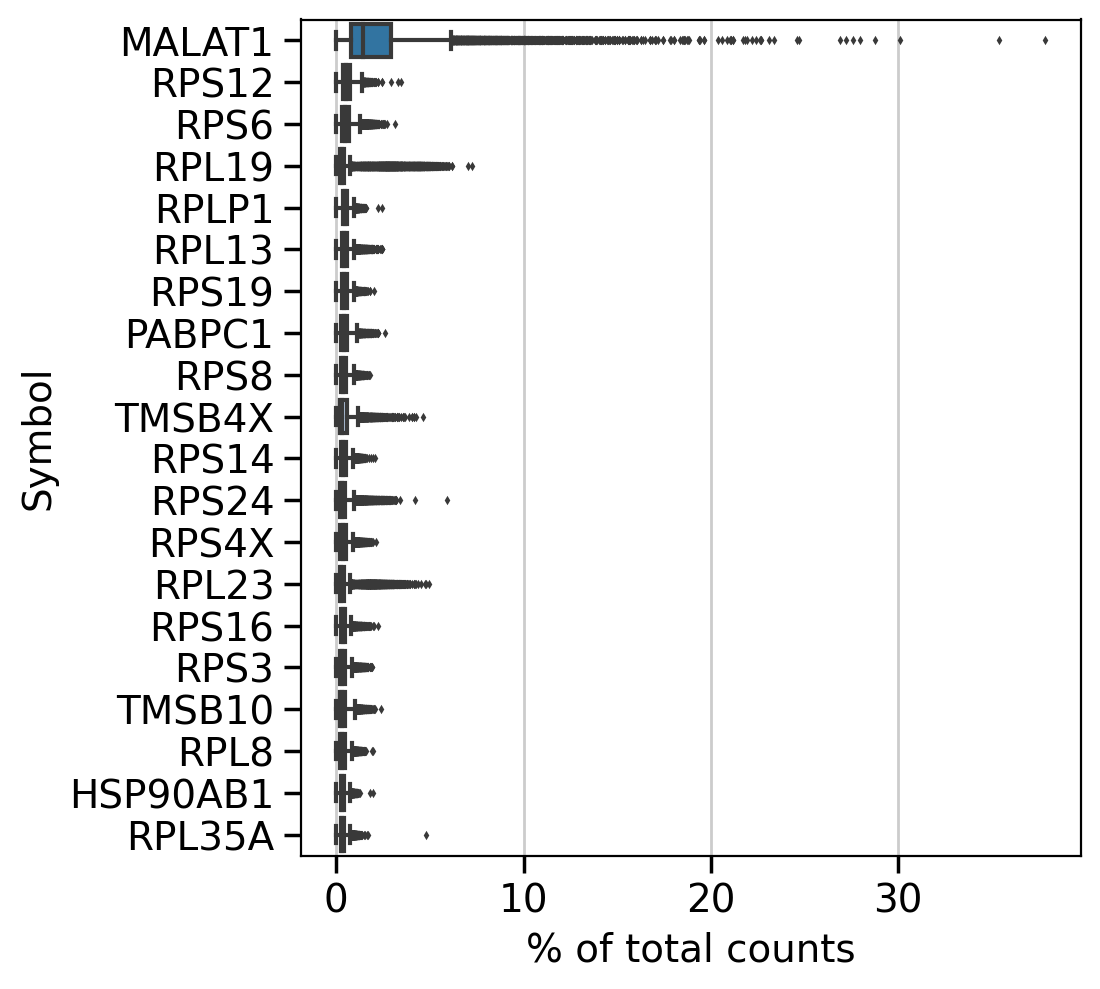

In [49]:
sc.pl.highest_expr_genes(adata, n_top=20,)

In [50]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [51]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

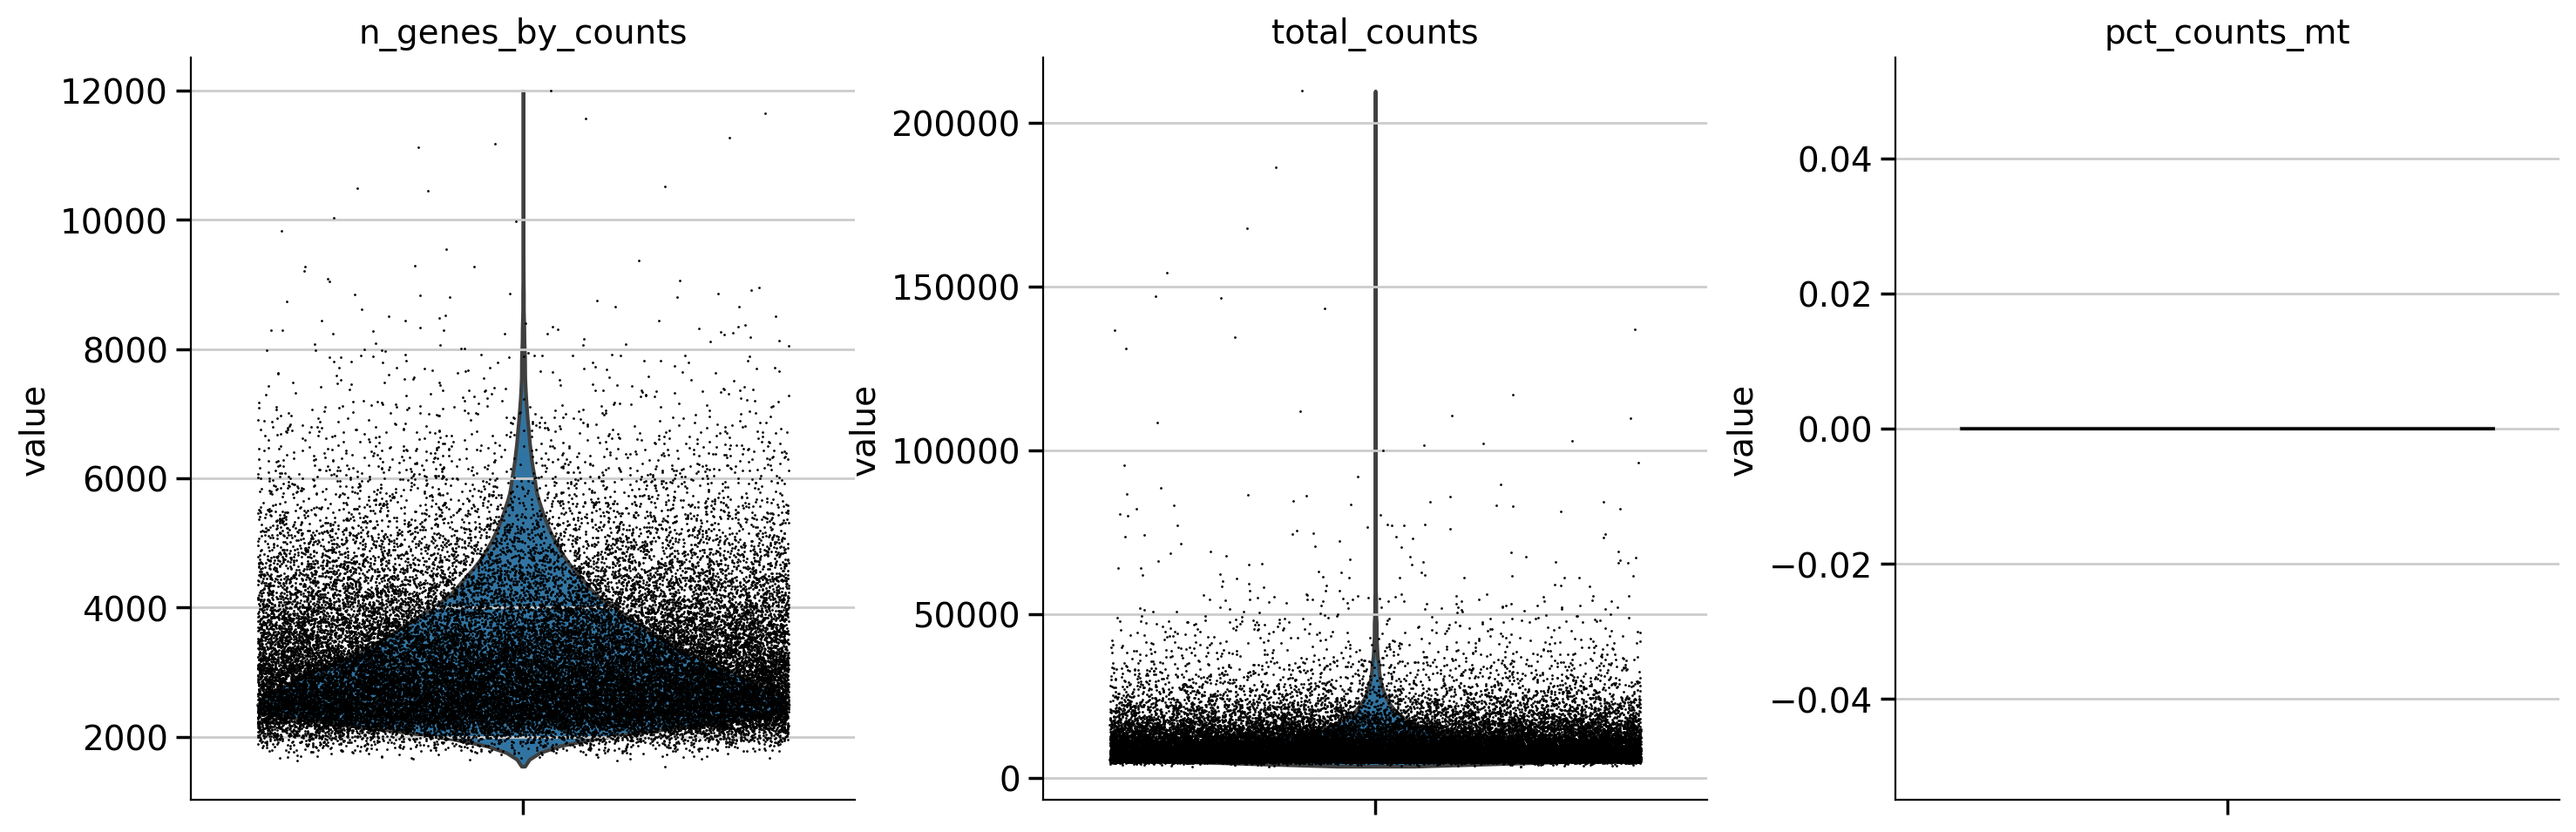

In [55]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

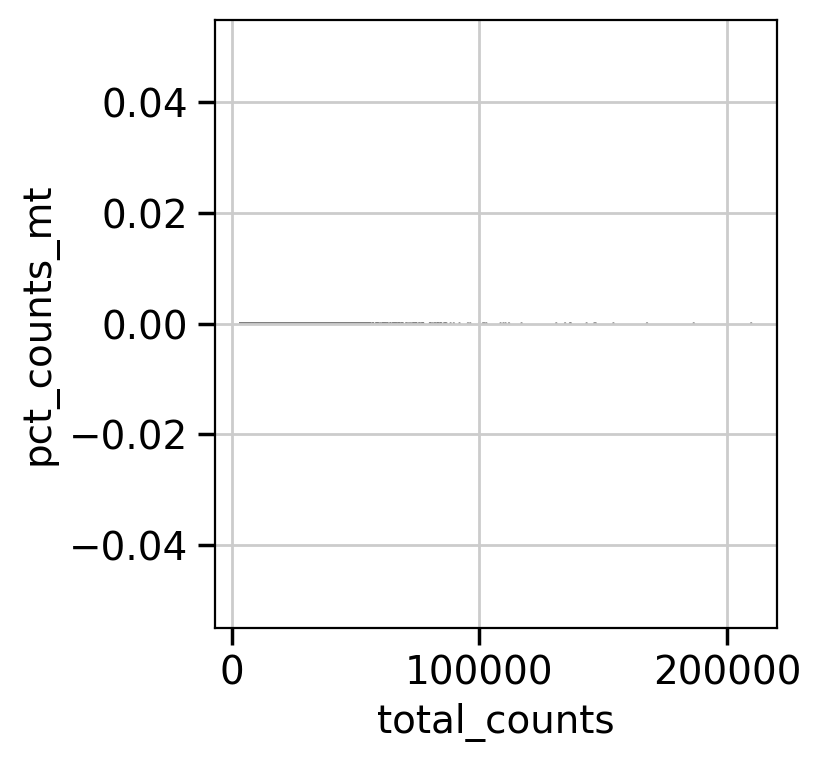

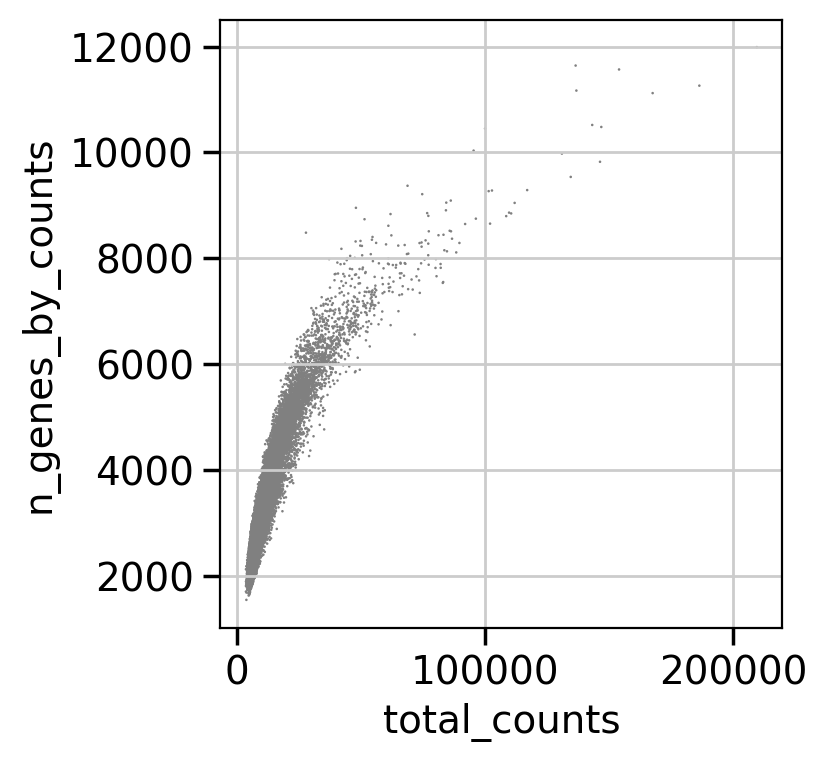

In [56]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [57]:
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [58]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [59]:
sc.pp.log1p(adata)

In [60]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


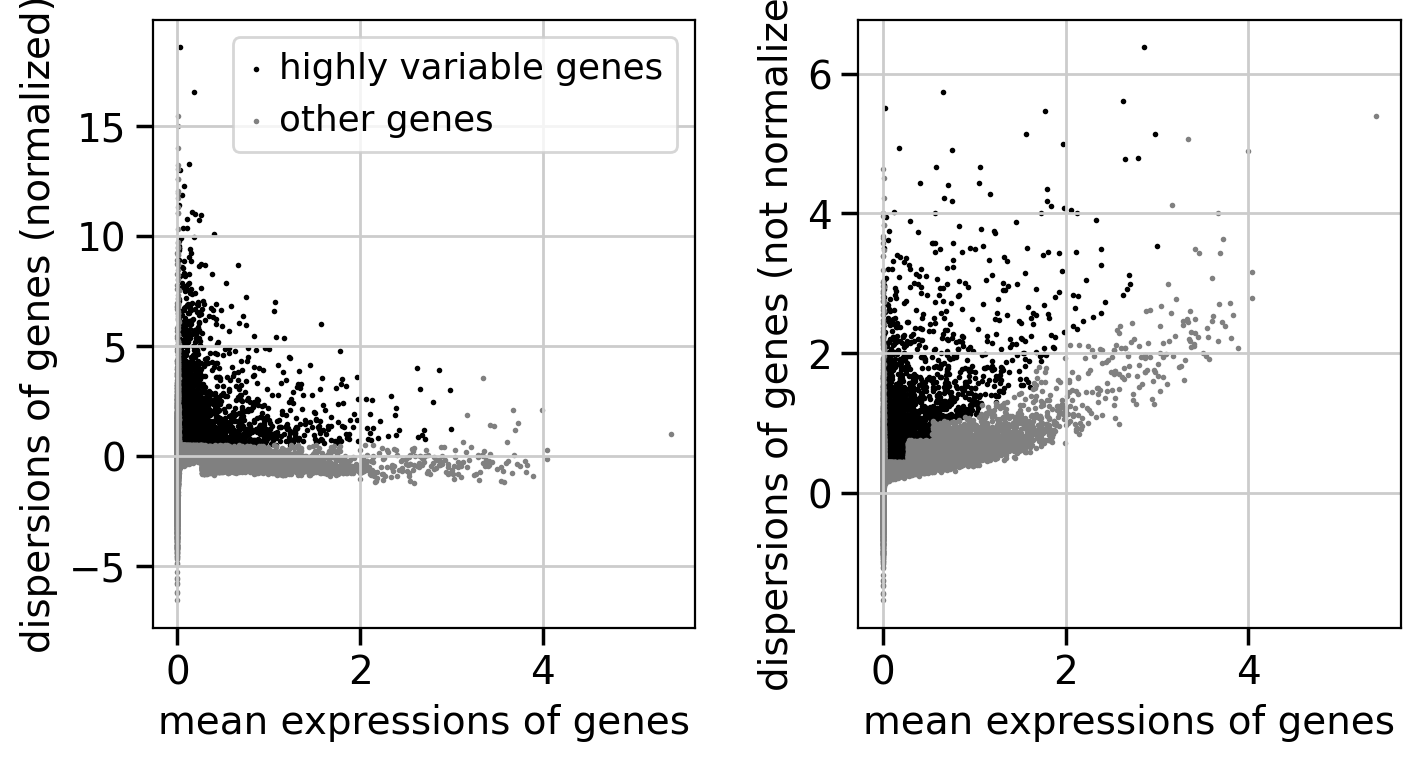

In [61]:
sc.pl.highly_variable_genes(adata)

In [62]:
adata.raw = adata

In [63]:
adata = adata[:, adata.var.highly_variable]

In [64]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [65]:
sc.pp.scale(adata, max_value=10)

In [66]:
sc.tl.pca(adata, svd_solver='arpack')

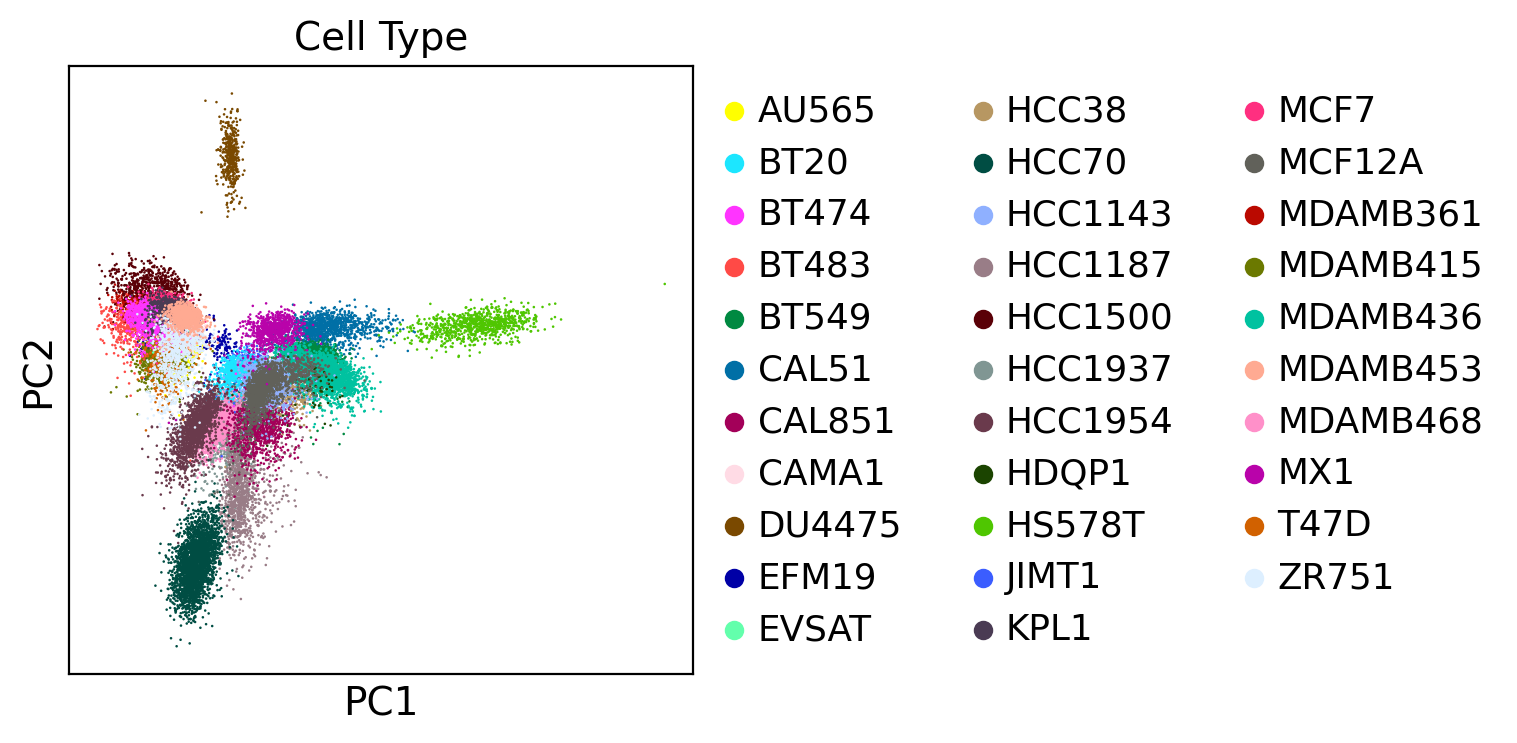

In [28]:
# rc_context is used for the figure size, in this case 4x4
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.pca(adata, color='Cell Type')

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)

In [31]:
# compute clusters using the leiden method and store the results with the name `clusters`
sc.tl.leiden(adata, key_added='clusters', resolution=0.5)